In this notebook, we:
- try different visualizations for multiple pareto-frontiers
- perform analyses (and significance tests if any)
- investigate methods to find "winning" systems (if needed)

<strong>Search for #finding, #question, #result tags!</strong>

In [17]:
% matplotlib inline


from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from pareto_frontiers import get_plot_data, get_pareto_frontier

In [18]:
import os, glob

def get_results_files(results_directory, track, normalized=True):
    track_directory = os.path.join(results_directory, track)
    tsvs = os.listdir(track_directory)
    norm_tsvs = filter(lambda x: x.startswith("norm"), tsvs)
    regular_tsvs = filter(lambda x: not x.startswith("norm"), tsvs)
    results = [ r for r in (norm_tsvs if normalized else regular_tsvs) ]    
    only_push = [x for x in filter(lambda x: "only.push" in x, results)]
    only_pull = [x for x in filter(lambda x: "only.pull" in x, results)]
    push_pull = [x for x in filter(lambda x: "push.pull" in x, results)]
    
    return only_push, only_pull, push_pull        

In [19]:
only_push, only_pull, push_pull = get_results_files("new-results/", "ts14")

In [90]:
def load_gvp_file(gvp_file, topic):
    with open(gvp_file) as inf:
        lines = inf.readlines()
        tpclines = filter(lambda x: topic in x, lines)
        gain_pain_points = []
        for line in tpclines:
            r, t, g, p, old_gain, old_pain = line.strip().split('\t')
            gain_pain_points.append( (float(p), float(g),  r) )
        gain_pain_points.sort()
        #print( gain_pain_points)
    return gain_pain_points

def frontier_functions(frontiers):
    pass

def plot_multi_frontier(gvp_files):
    #TODO: also process frontier fractions
    if args.multiple_pareto_fronts:
        print (plot_title)
        multi_fronts.append( (frontier, plot_title) ) # the frontier and the param settings in the plot_title
    pass
    

def plot_single_frontier(gvp_file, results_folder, track, topic='AVG'):
    gvp_path = os.path.join(results_folder, track, gvp_file)
    gain_pain_points = load_gvp_file(gvp_path, topic)
    frontier = get_pareto_frontier(gain_pain_points)
    
    plot_title, plot_output_file = get_plot_data(gvp_file, track, os.path.join(results_folder, track))
    # print(plot_title, plot_output_file)

    if 'only.push' in plot_title:
        plot_title = plot_title.replace('.21600', '')                           

    # for the paper: TODO: remove later
    track, params = plot_title.split(':')
    params = params.split('; ')[:2]
    # params = params.replace('p', 'persistence')
    
    #plot_title = r'{}: All Systems'.format(track)    # USE FOR PAPER
    plot_title = r'{}: {}'.format(track, '; '.join(params))

    gvp_plot = plot_graph(gain_pain_points, 'go', plot_title, frontier, track)
    #gvp_plot.show()

    # pp = PdfPages(plot_output_file)
    # pp.savefig(gvp_plot)
    # pp.close()
    return gvp_plot

def load_results_file(gvp_file, results_folder, track, topic="AVG"):
    gvp_path = os.path.join(results_folder, track, gvp_file)
    gain_pain_points = load_gvp_file(gvp_path, topic)
    frontier = get_pareto_frontier(gain_pain_points)
    plot_title, plot_output_file = get_plot_data(gvp_file, track, os.path.join(results_folder, track))
    if 'only.push' in plot_title:
        plot_title = plot_title.replace('.21600', '')                           
    track, params = plot_title.split(':')
    params = params.split('; ')[:2]
    # params = params.replace('p', 'persistence')
   
    #plot_title = r'{}: All Systems'.format(track)    # USE FOR PAPER
    plot_title = r'{}:{}'.format(track, '; '.join(params))
    return plot_title, gain_pain_points, frontier

    
def plot_graph(points, colorcodes, title_text, frontier, track):
    fig = plt.figure()
    plt.tick_params(labelsize=12)
    plot_x, plot_y, rnames = zip(*points)

    plt.plot(plot_x, plot_y, colorcodes)
    plt.ylabel('Gain', fontsize=15)
    plt.xlabel('Pain', fontsize=15)
    plt.title(title_text, fontsize=18)

    fX, fY, fnames = zip(*frontier)
    plt.plot(fX, fY)
    for i, fname in enumerate(fnames):
        plt.text(fX[i], fY[i], fname.replace('input.', ''), fontsize=12, verticalalignment='top')
    
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
    ax = plt.gca()

    if track == 'TS14':       
       pass

    if track == 'MB15':
        y_major_ticks = np.arange(0, .25, 0.05) 
        ax.set_yticks(y_major_ticks)        
    
    if track == 'RTS16':
        plt.xlim(0, 40)
        plt.ylim(0, ymax)
        y_major_ticks = np.arange(0, .180, 0.05) 
        ax.set_yticks(y_major_ticks)
        

    plt.grid(linestyle='dotted', linewidth='1')

    plt.tight_layout()
    return fig

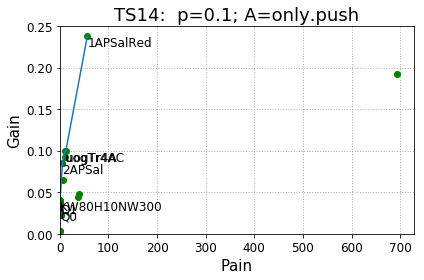

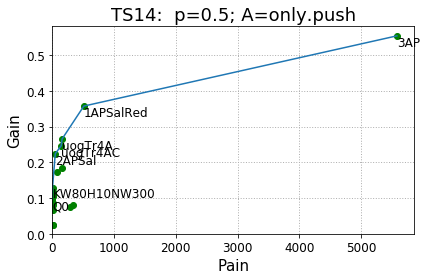

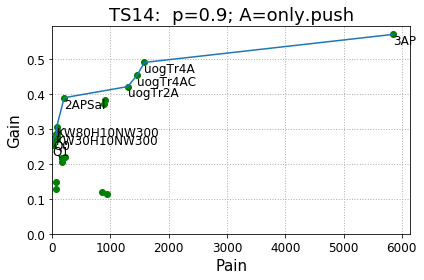

In [64]:
for c in range(3):
    plot_single_frontier(only_push[c], "new-results/", "ts14")

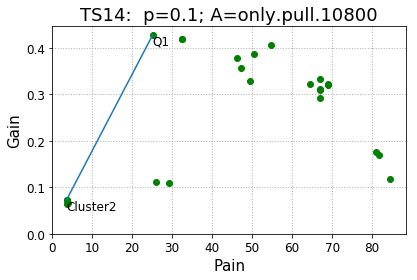

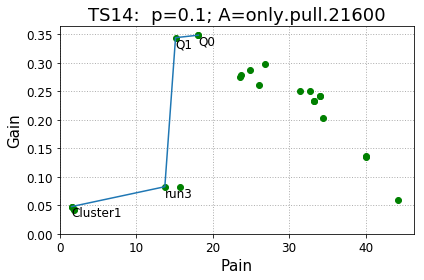

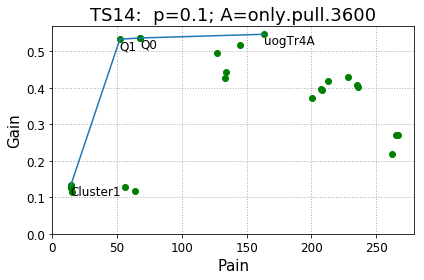

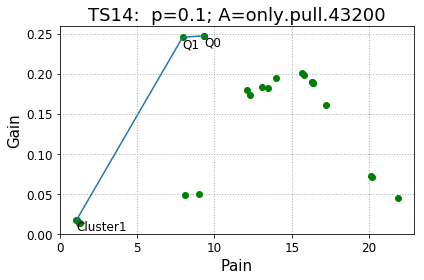

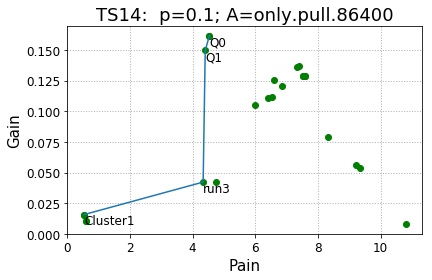

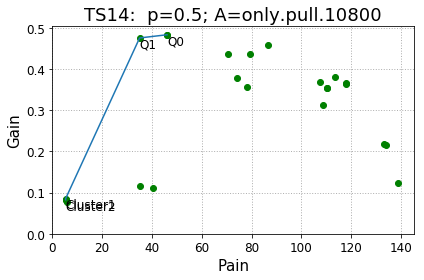

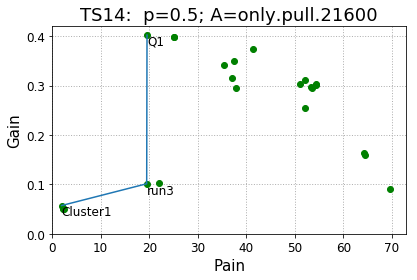

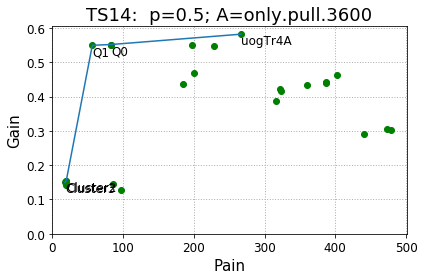

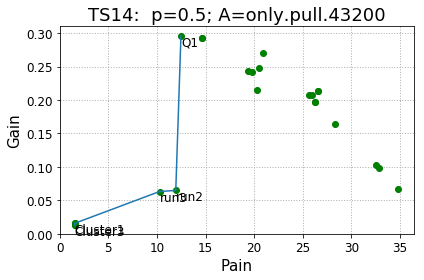

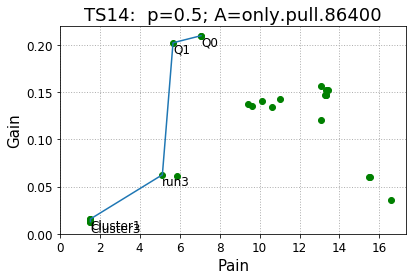

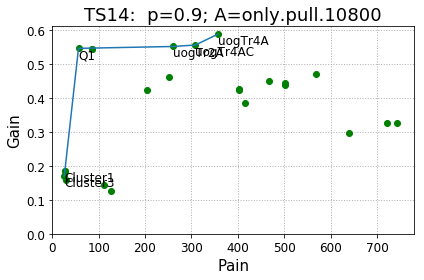

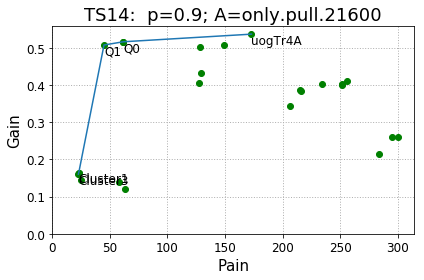

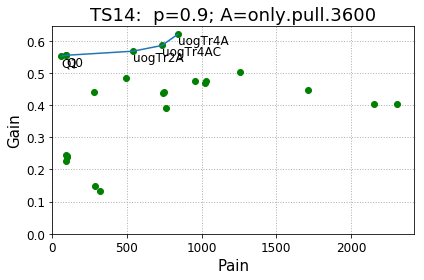

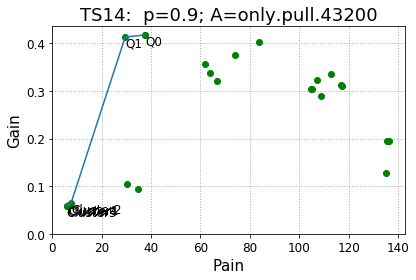

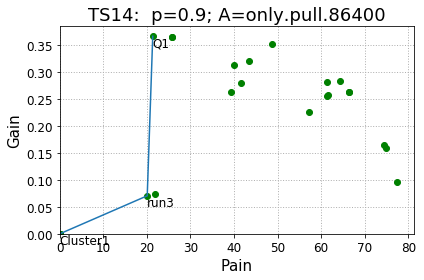

In [66]:
for file in sorted(only_pull):
     plot_single_frontier(file, "new-results/", "ts14")

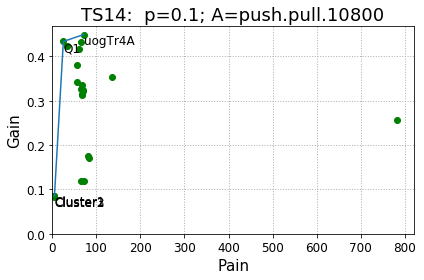

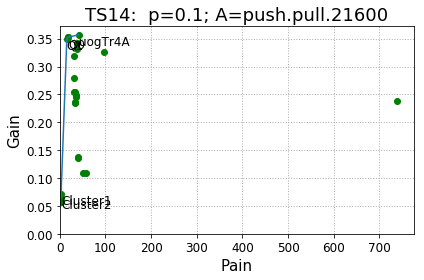

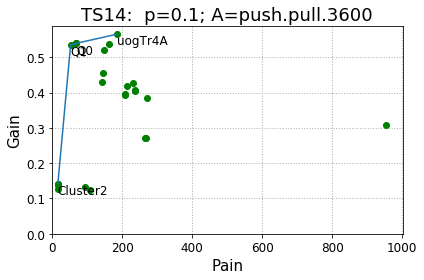

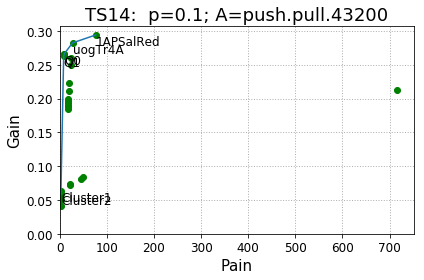

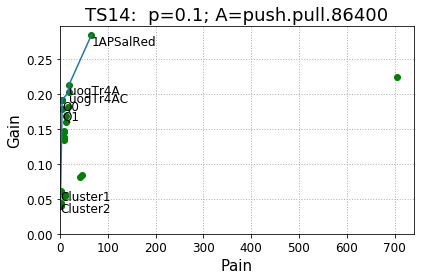

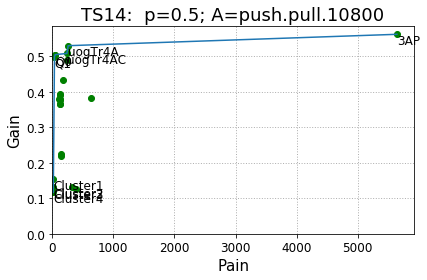

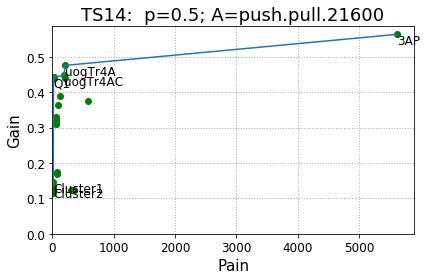

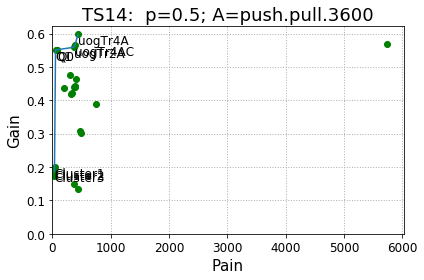

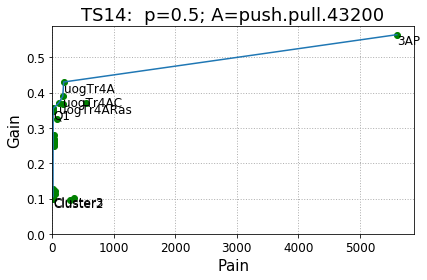

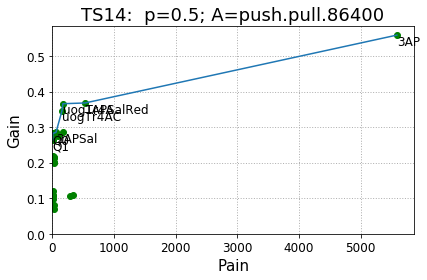

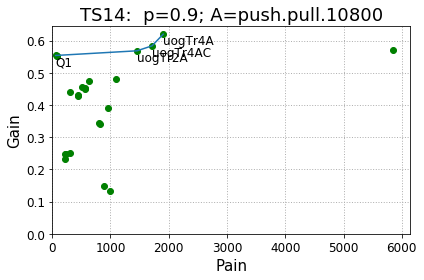

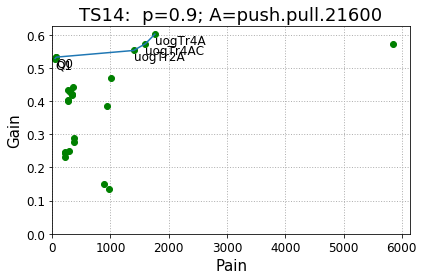

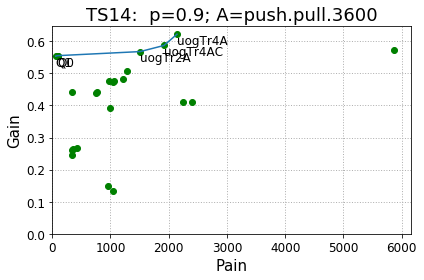

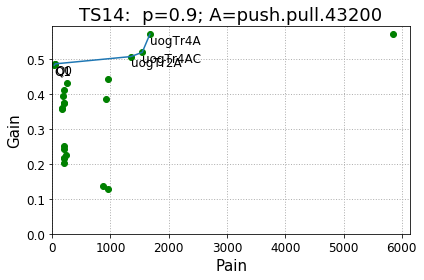

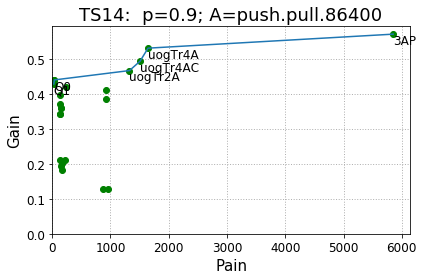

In [67]:
for file in sorted(push_pull):
     plot_single_frontier(file, "new-results/", "ts14")

## Trying 3D visualization

In [150]:
from mpl_toolkits.mplot3d import Axes3D

def push_model_3dPlots(push_files, results_folder, track):
    
    fig = plt.figure(figsize=(20,6))    
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 3]) 
    ax = fig.add_subplot(gs[0], projection='3d')
    ax2 = fig.add_subplot(gs[1])
    
    sup_title = None
    
    for file in push_files:
        plot_title, gain_pain_points, frontier = load_results_file(file, results_folder, track)
        fX, fY, fnames = zip(*frontier)
        print(plot_title)
        p = float(plot_title.split('=')[1].split(';')[0])
        x_coord = np.zeros(len(fX))
        x_coord += p
        ax.plot(x_coord, fX, fY, label='p={:.1f}'.format(p), marker='o')
        ax.set_xlabel("Persistence", fontsize=12)
        ax.set_ylabel("Pain", fontsize=12)
        ax.set_zlabel("Gain", fontsize=12)
        ax.legend()
        
        ax2.plot(fX, fY, label='p={:.1f}'.format(p), marker='o')
        ax2.set_xlabel("Pain", fontsize=12)
        ax2.set_ylabel("Gain", fontsize=12)        
        ax2.legend()
        
        if not sup_title:
            sup_title = '{}: {}'.format(track.upper(), plot_title.split(';')[-1].strip())
    
    
    plt.suptitle(sup_title, fontsize=14)

# TS14 #results

## TS14: only.push, persistence=0.1, 0.5, 0.9

TS14: p=0.1; A=only.push
TS14: p=0.5; A=only.push
TS14: p=0.9; A=only.push


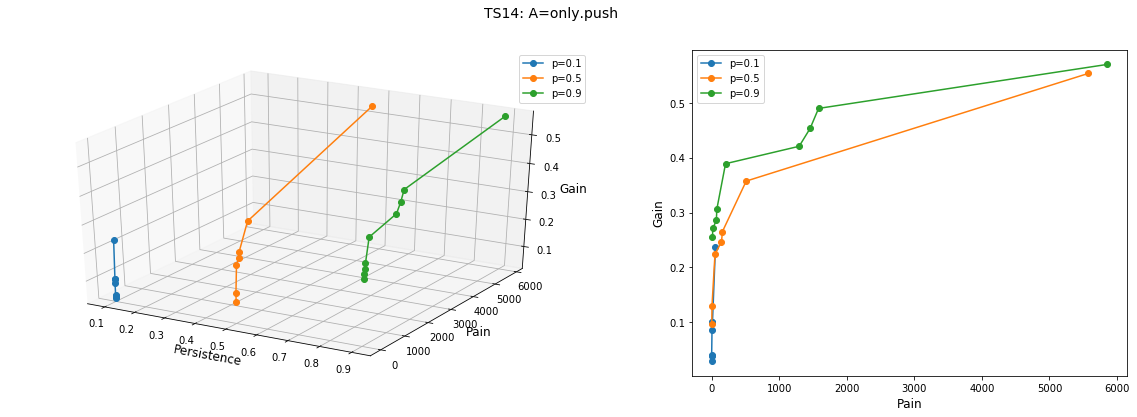

In [157]:
push_model_3dPlots(only_push, "new-results/", "ts14")

<strong>#finding: Interesting, we can see using the 2 plots, how different the frontiers are for different user models (persistence).
In these plots above we have "only.push" with p = {0.1, 0.5, 0.9} </strong>

In [152]:
from matplotlib import gridspec

def pull_model_3dPlots(pull_files, persistence, results_folder, track):
    frontiers = []
    for file in pull_files:
        plot_title, gain_pain_points, frontier = load_results_file(file, results_folder, track)
        ks = 'p={:.1f}'.format(persistence)
        if ks in plot_title:
            frontiers.append((plot_title, frontier))
    
    frontiers.sort(key=lambda t: int(t[0].split('.')[-1]))
    print ('\n'.join([f[0] for f in frontiers]))
    plot_title = '.'.join(frontiers[0][0].split('.')[:-1])
    
    fig = plt.figure(figsize=(20,6))
    plt.suptitle(plot_title, fontsize=14)
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 3]) 
    ax = fig.add_subplot(gs[0], projection='3d')
    ax2 = fig.add_subplot(gs[1])
    for title, frontier in frontiers:
        fX, fY, fnames = zip(*frontier)
        x_coord = np.ones(len(fX))
        hours = int(title.split('.')[-1])/60/60
        x_coord *= hours
        ax.plot(x_coord, fX, fY, label="A={} hr".format(hours), marker='o')
        ax.set_xlabel("Means Away Hours", fontsize=12)
        ax.set_ylabel("Pain", fontsize=12)
        ax.set_zlabel("Gain", fontsize=12)
        ax.legend()
        
        ax2.plot(fX, fY, label="A={} hr".format(hours), marker='o')
        ax2.set_xlabel("Pain", fontsize=12)
        ax2.set_ylabel("Gain", fontsize=12)        
        ax2.legend()

## TS14: only.pull, p=0.1, p=0.5, p=0.9

TS14: p=0.1; A=only.pull.3600
TS14: p=0.1; A=only.pull.10800
TS14: p=0.1; A=only.pull.21600
TS14: p=0.1; A=only.pull.43200
TS14: p=0.1; A=only.pull.86400
TS14: p=0.5; A=only.pull.3600
TS14: p=0.5; A=only.pull.10800
TS14: p=0.5; A=only.pull.21600
TS14: p=0.5; A=only.pull.43200
TS14: p=0.5; A=only.pull.86400
TS14: p=0.9; A=only.pull.3600
TS14: p=0.9; A=only.pull.10800
TS14: p=0.9; A=only.pull.21600
TS14: p=0.9; A=only.pull.43200
TS14: p=0.9; A=only.pull.86400


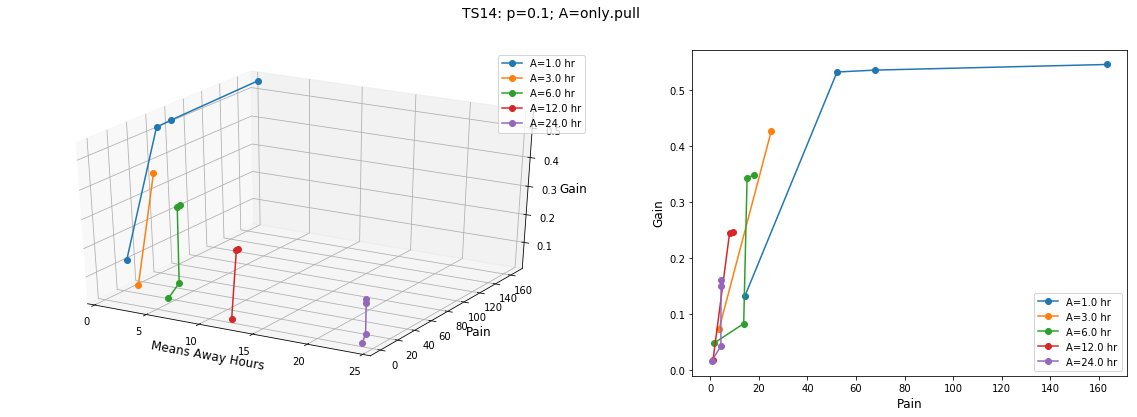

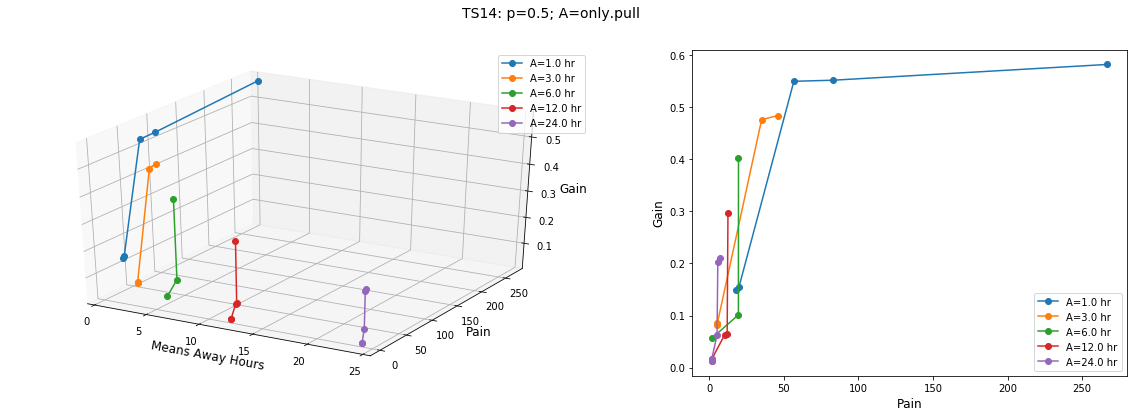

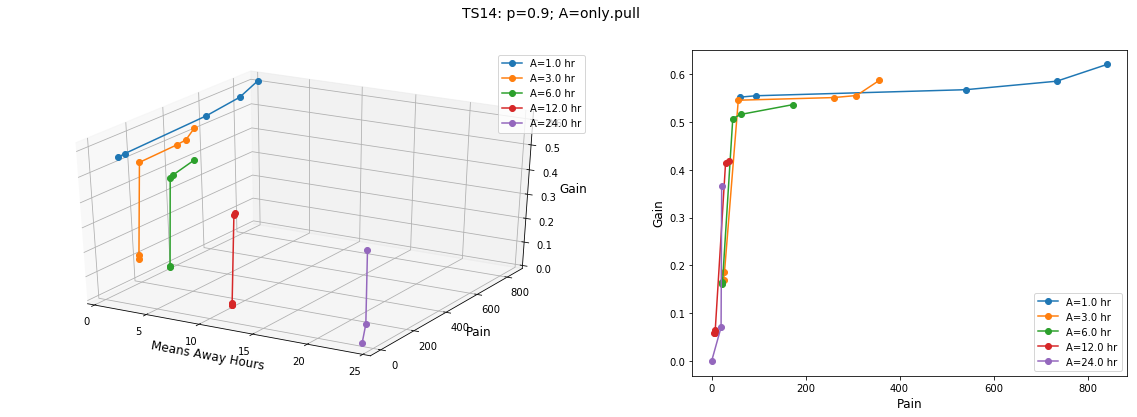

In [185]:
pull_model_3dPlots(only_pull, 0.1, "new-results/", "ts14")
pull_model_3dPlots(only_pull, 0.5, "new-results/", "ts14")
pull_model_3dPlots(only_pull, 0.9, "new-results/", "ts14")

## TS14: push.pull, p=0.1, p=0.5, p=0.9

TS14: p=0.1; A=push.pull.3600
TS14: p=0.1; A=push.pull.10800
TS14: p=0.1; A=push.pull.21600
TS14: p=0.1; A=push.pull.43200
TS14: p=0.1; A=push.pull.86400
TS14: p=0.5; A=push.pull.3600
TS14: p=0.5; A=push.pull.10800
TS14: p=0.5; A=push.pull.21600
TS14: p=0.5; A=push.pull.43200
TS14: p=0.5; A=push.pull.86400
TS14: p=0.9; A=push.pull.3600
TS14: p=0.9; A=push.pull.10800
TS14: p=0.9; A=push.pull.21600
TS14: p=0.9; A=push.pull.43200
TS14: p=0.9; A=push.pull.86400


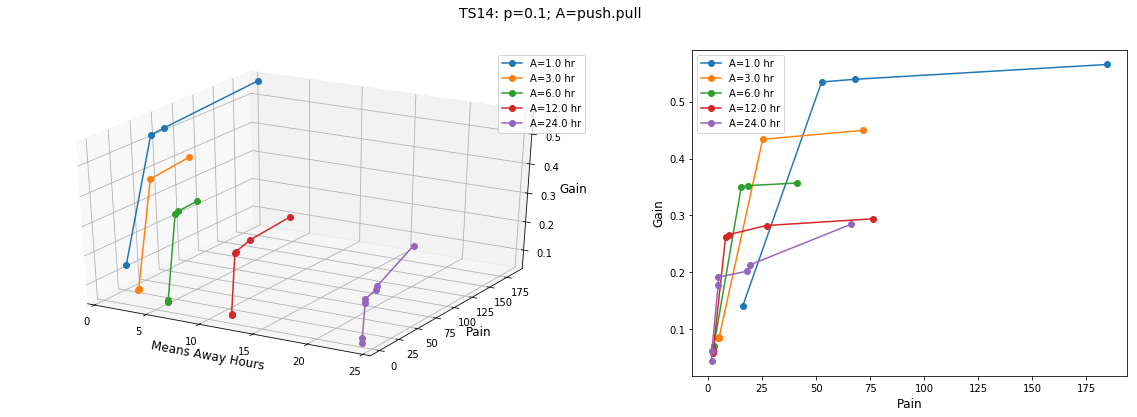

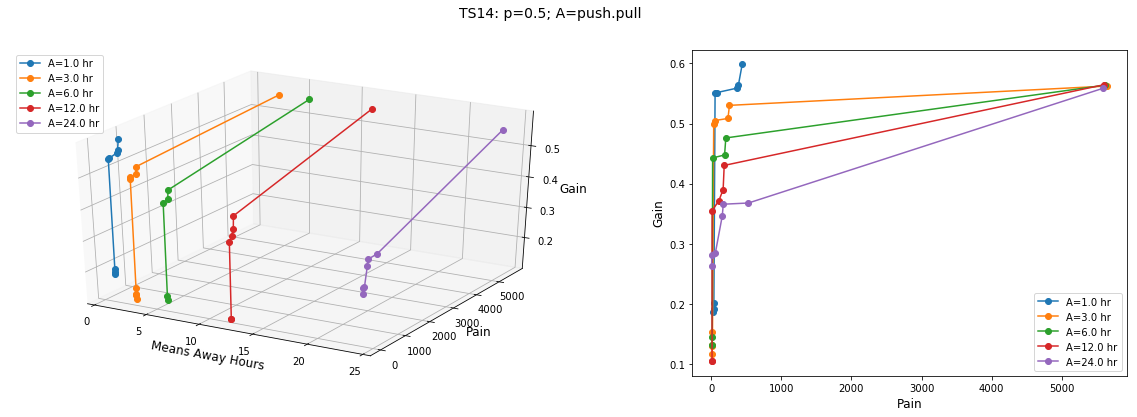

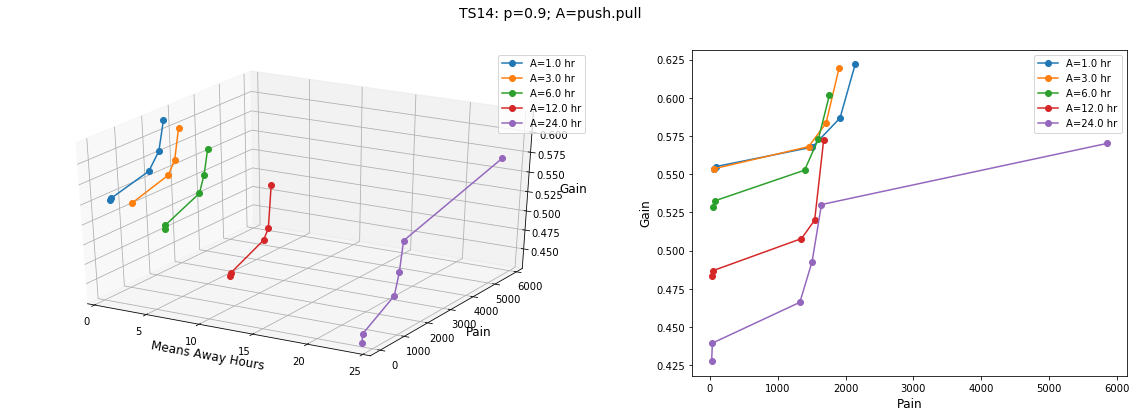

In [186]:
pull_model_3dPlots(push_pull, 0.1, "new-results/", "ts14")
pull_model_3dPlots(push_pull, 0.5, "new-results/", "ts14")
pull_model_3dPlots(push_pull, 0.9, "new-results/", "ts14")

<strong> #finding: We can see that the push.pull and only.pull achieve more gain than the only.push models. </strong>

<strong>#finding: The pareto-fronts for *.pull models are quite different: for different $p$, the frontiers differ in number of systems, gain, and pain.
- Users with p=0.5 following the push.pull interaction model, seem to get the most bang for thier buck
- Users following the only.pull model seem to experience lesser pain (#question: significance test needed)</strong>

TS14: p=0.5; A=only.pull.3600
TS14: p=0.5; A=push.pull.3600
TS14: p=0.5; A=only.pull.10800
TS14: p=0.5; A=push.pull.10800
TS14: p=0.5; A=only.pull.21600
TS14: p=0.5; A=push.pull.21600
TS14: p=0.5; A=only.pull.43200
TS14: p=0.5; A=push.pull.43200
TS14: p=0.5; A=only.pull.86400
TS14: p=0.5; A=push.pull.86400


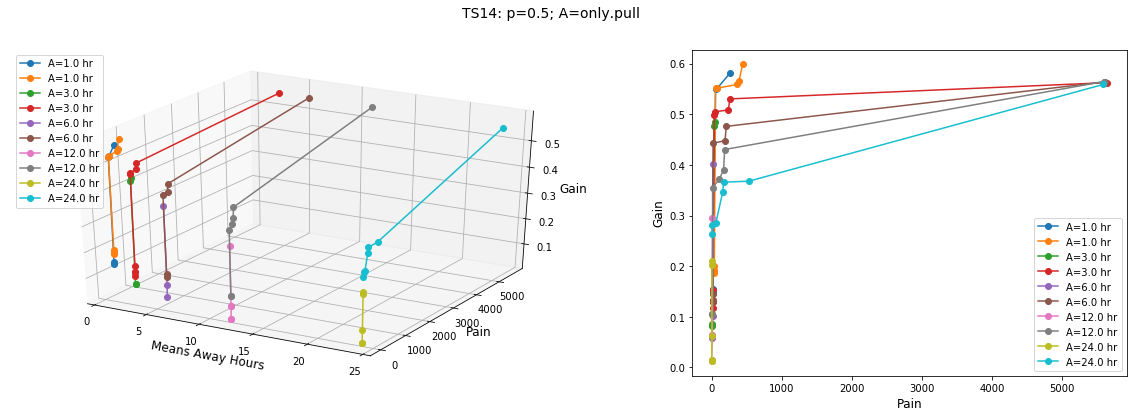

In [184]:
pull_model_3dPlots(only_pull+push_pull, 0.5, "new-results/", "ts14")

<strong>#finding: the frontiers (and thereby, the gains) overlap between the push.pull and the only.push models. The 3D plot shows that only.pull models can achieve very low amounts of gain where push.pull may fail (24 hour lines)</strong>

<strong>#question: given that there are 3 main **user-system** interaction models, how can we decide which system is best?
- We know all systems on the pareto-frontiers are good
- It may be reasonable to assume that those systems that are consistently present across different frontiers (for different user models), are likely to be the "best" systems. 
- Could we then think of a "user-model-coverage" metric? 
</strong>

# MB15 #results

In [148]:
mb15_only_push, mb15_only_pull, mb15_push_pull = get_results_files("new-results/", "mb15")

## MB15: only.push, p=0.1, 0.5, 0.9

MB15: p=0.1; A=only.push
MB15: p=0.5; A=only.push
MB15: p=0.9; A=only.push


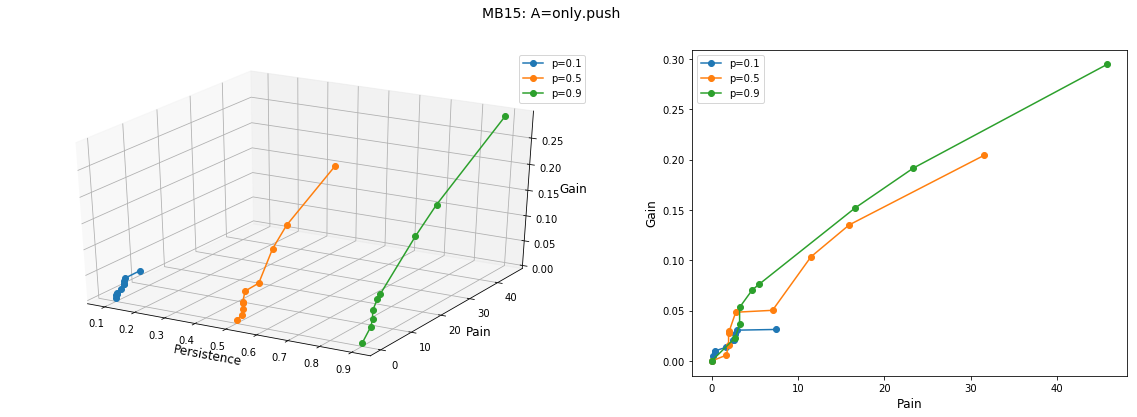

In [165]:
push_model_3dPlots(mb15_only_push, "new-results/", "mb15")

## MB15: only.pull, p=0.1, p=0.5, p=0.9

MB15: p=0.1; A=only.pull.3600
MB15: p=0.1; A=only.pull.10800
MB15: p=0.1; A=only.pull.21600
MB15: p=0.1; A=only.pull.43200
MB15: p=0.1; A=only.pull.86400


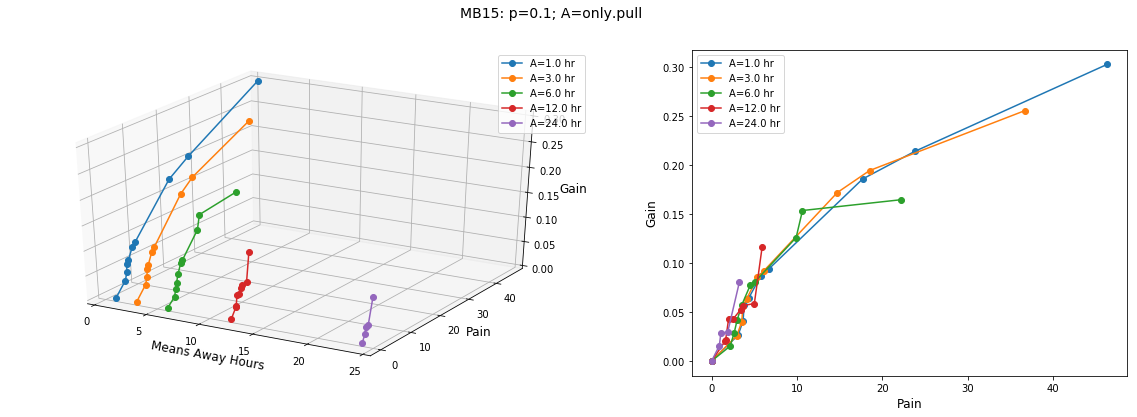

In [166]:
pull_model_3dPlots(mb15_only_pull, 0.1, "new-results/", "mb15")

MB15: p=0.5; A=only.pull.3600
MB15: p=0.5; A=only.pull.10800
MB15: p=0.5; A=only.pull.21600
MB15: p=0.5; A=only.pull.43200
MB15: p=0.5; A=only.pull.86400


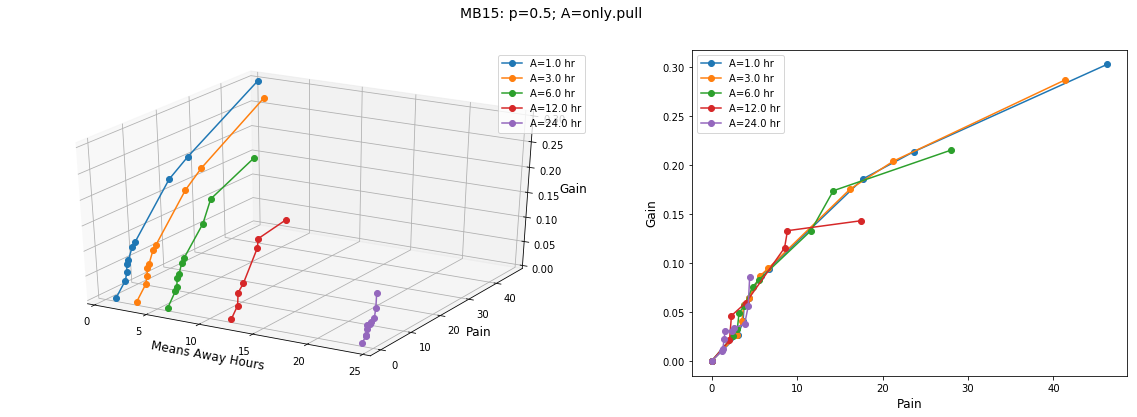

In [167]:
pull_model_3dPlots(mb15_only_pull, 0.5, "new-results/", "mb15")

MB15: p=0.9; A=only.pull.3600
MB15: p=0.9; A=only.pull.10800
MB15: p=0.9; A=only.pull.21600
MB15: p=0.9; A=only.pull.43200
MB15: p=0.9; A=only.pull.86400


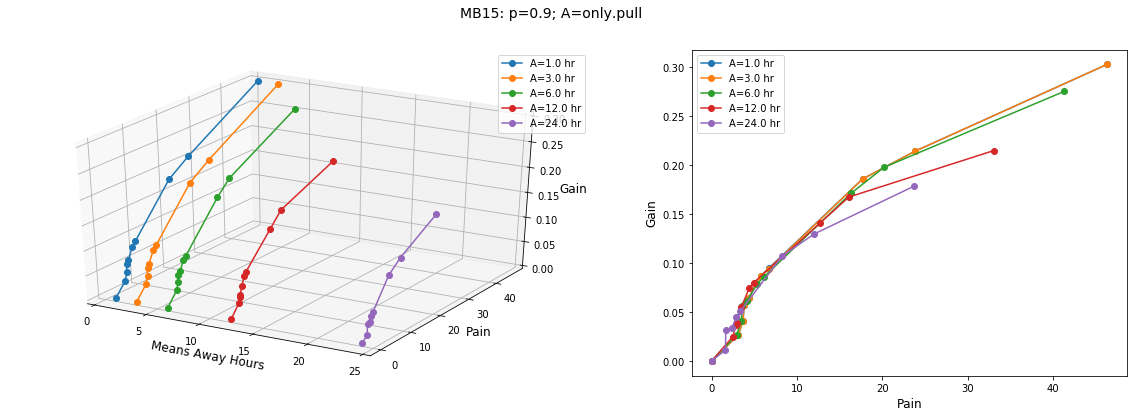

In [168]:
pull_model_3dPlots(mb15_only_pull, 0.9, "new-results/", "mb15")

## MB15: push.pull, p=0.1, p=0.5, p=0.9

MB15: p=0.1; A=push.pull.3600
MB15: p=0.1; A=push.pull.10800
MB15: p=0.1; A=push.pull.21600
MB15: p=0.1; A=push.pull.43200
MB15: p=0.1; A=push.pull.86400


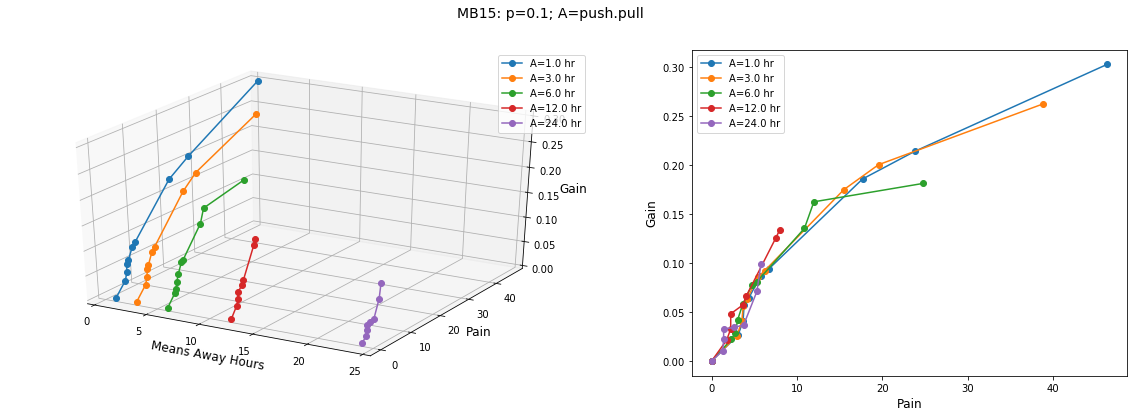

In [169]:
pull_model_3dPlots(mb15_push_pull, 0.1, "new-results/", "mb15")

MB15: p=0.5; A=push.pull.3600
MB15: p=0.5; A=push.pull.10800
MB15: p=0.5; A=push.pull.21600
MB15: p=0.5; A=push.pull.43200
MB15: p=0.5; A=push.pull.86400


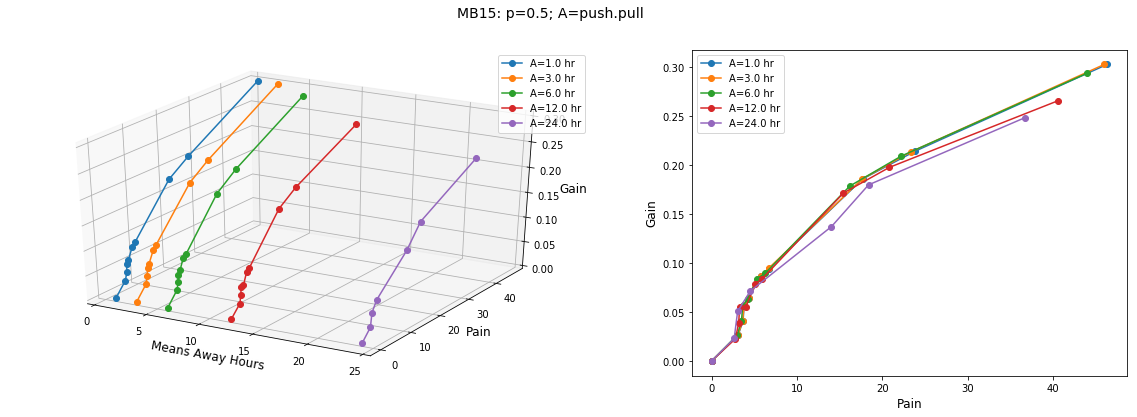

In [170]:
pull_model_3dPlots(mb15_push_pull, 0.5, "new-results/", "mb15")

MB15: p=0.9; A=push.pull.3600
MB15: p=0.9; A=push.pull.10800
MB15: p=0.9; A=push.pull.21600
MB15: p=0.9; A=push.pull.43200
MB15: p=0.9; A=push.pull.86400


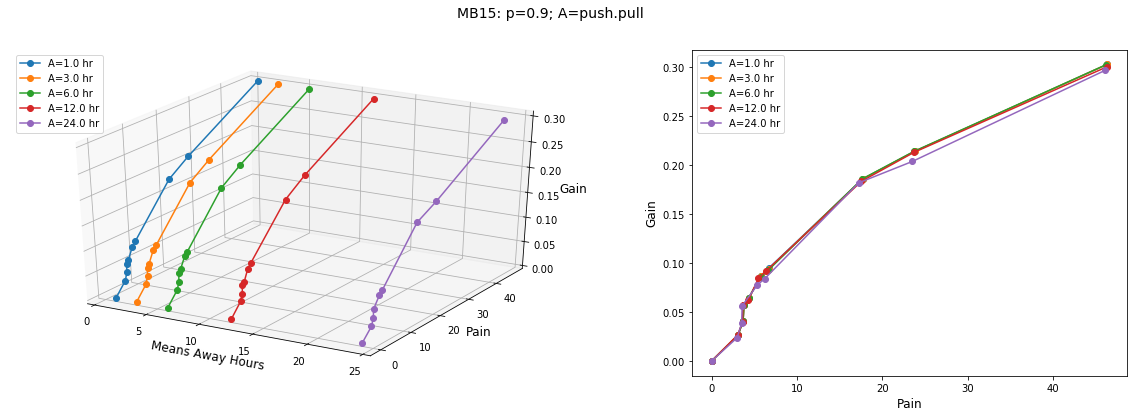

In [171]:
pull_model_3dPlots(mb15_push_pull, 0.9, "new-results/", "mb15")

<strong>#finding: For MB15
- regardless of your persistence, if you visit the system every hour, you can get close to maximum achievable gain
- if you visit the system less often, you should have high persistence to get more gain
- push.pull interaction model gets more gain than only.pull for similar levels of persistence</strong>

# RTS16 #results

In [174]:
rts16_only_push, rts16_only_pull, rts16_push_pull = get_results_files("new-results/", "rts16")

## RTS16: only.push, p=0.1, 0.5, 0.9

RTS16: p=0.1; A=only.push
RTS16: p=0.5; A=only.push
RTS16: p=0.9; A=only.push


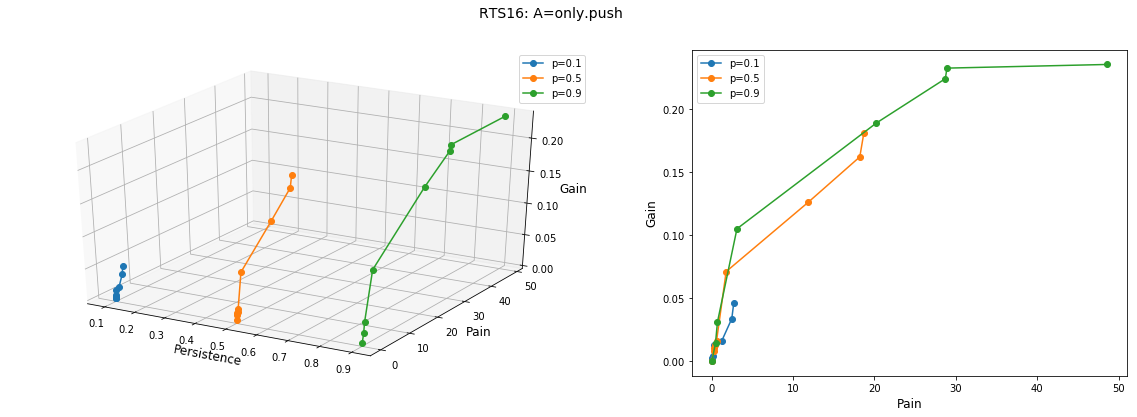

In [175]:
push_model_3dPlots(rts16_only_push, "new-results/", "rts16")

## RTS16: only.pull, p=0.1, p=0.5, p=0.9

RTS16: p=0.1; A=only.pull.3600
RTS16: p=0.1; A=only.pull.10800
RTS16: p=0.1; A=only.pull.21600
RTS16: p=0.1; A=only.pull.43200
RTS16: p=0.1; A=only.pull.86400
RTS16: p=0.5; A=only.pull.3600
RTS16: p=0.5; A=only.pull.10800
RTS16: p=0.5; A=only.pull.21600
RTS16: p=0.5; A=only.pull.43200
RTS16: p=0.5; A=only.pull.86400
RTS16: p=0.9; A=only.pull.3600
RTS16: p=0.9; A=only.pull.10800
RTS16: p=0.9; A=only.pull.21600
RTS16: p=0.9; A=only.pull.43200
RTS16: p=0.9; A=only.pull.86400


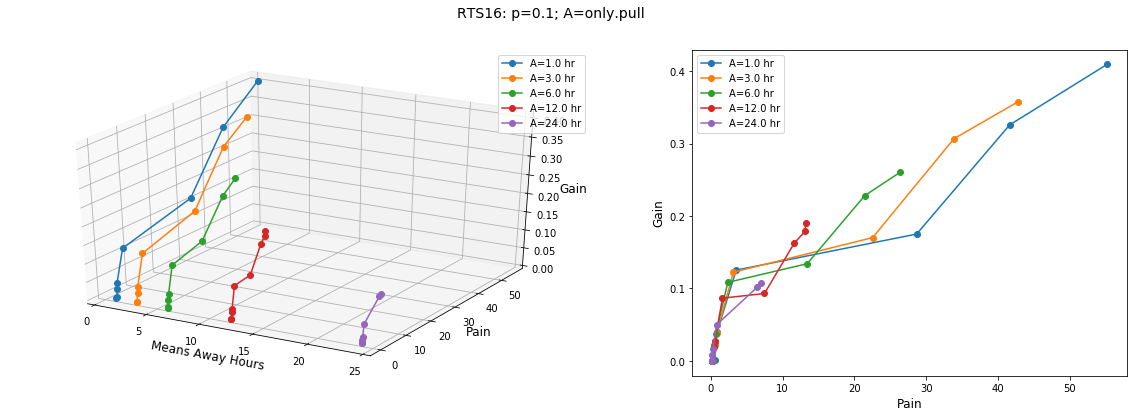

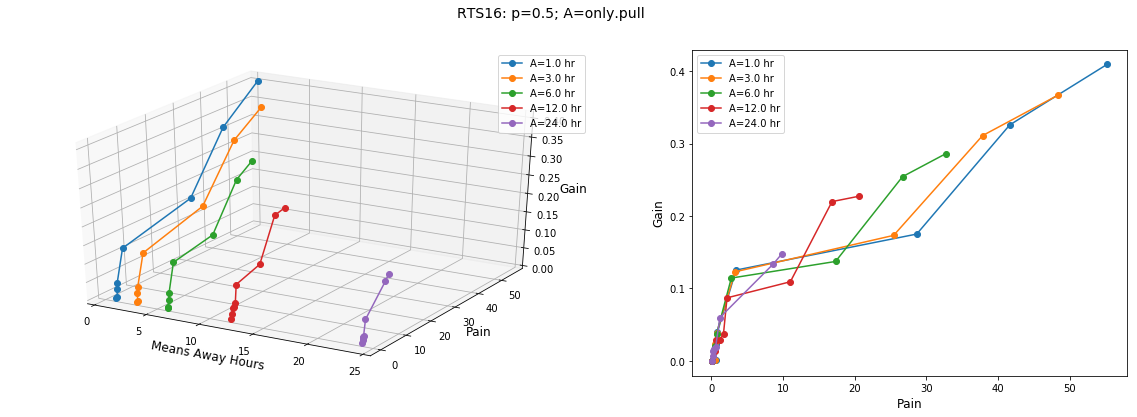

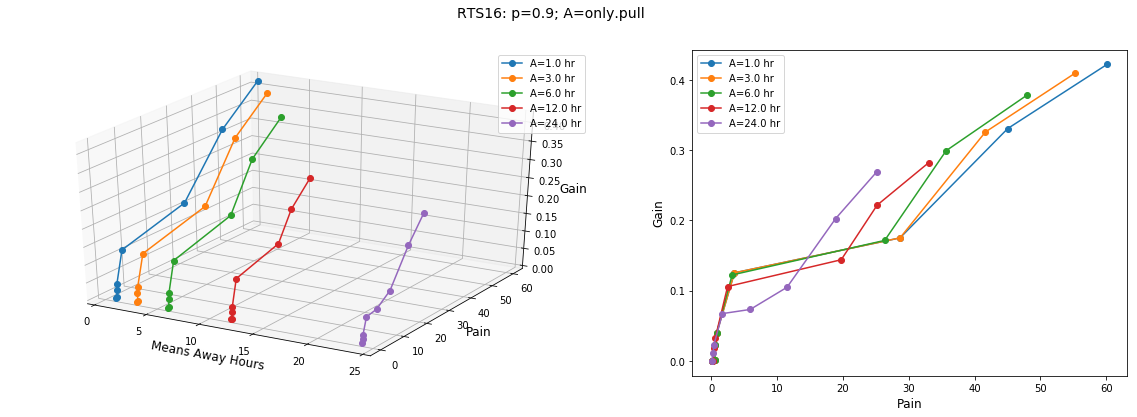

In [177]:
pull_model_3dPlots(rts16_only_pull, 0.1, "new-results/", "rts16")
pull_model_3dPlots(rts16_only_pull, 0.5, "new-results/", "rts16")
pull_model_3dPlots(rts16_only_pull, 0.9, "new-results/", "rts16")

## RTS16: push.pull, p=0.1, p=0.5, p=0.9

RTS16: p=0.1; A=push.pull.3600
RTS16: p=0.1; A=push.pull.10800
RTS16: p=0.1; A=push.pull.21600
RTS16: p=0.1; A=push.pull.43200
RTS16: p=0.1; A=push.pull.86400
RTS16: p=0.5; A=push.pull.3600
RTS16: p=0.5; A=push.pull.10800
RTS16: p=0.5; A=push.pull.21600
RTS16: p=0.5; A=push.pull.43200
RTS16: p=0.5; A=push.pull.86400
RTS16: p=0.9; A=push.pull.3600
RTS16: p=0.9; A=push.pull.10800
RTS16: p=0.9; A=push.pull.21600
RTS16: p=0.9; A=push.pull.43200
RTS16: p=0.9; A=push.pull.86400


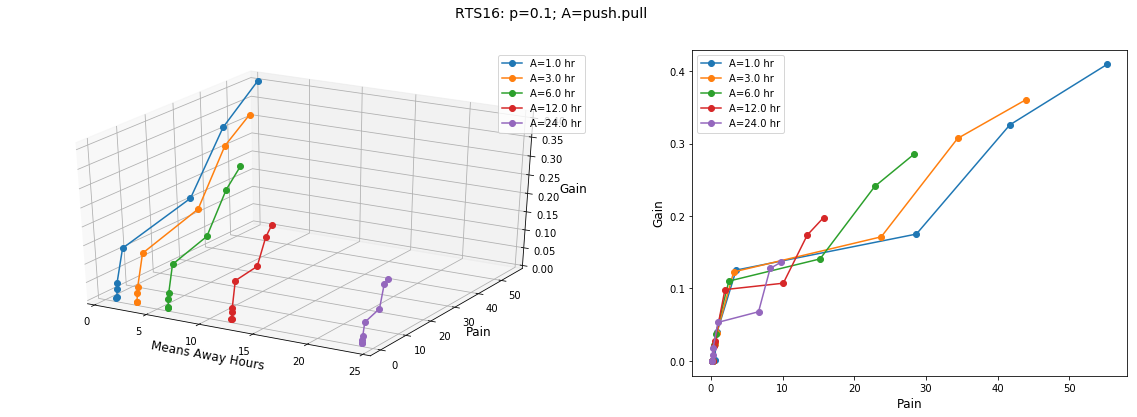

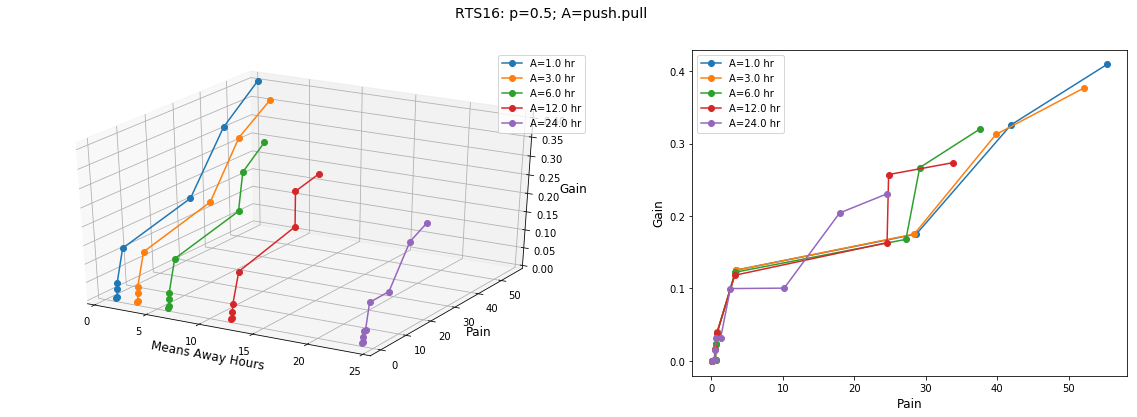

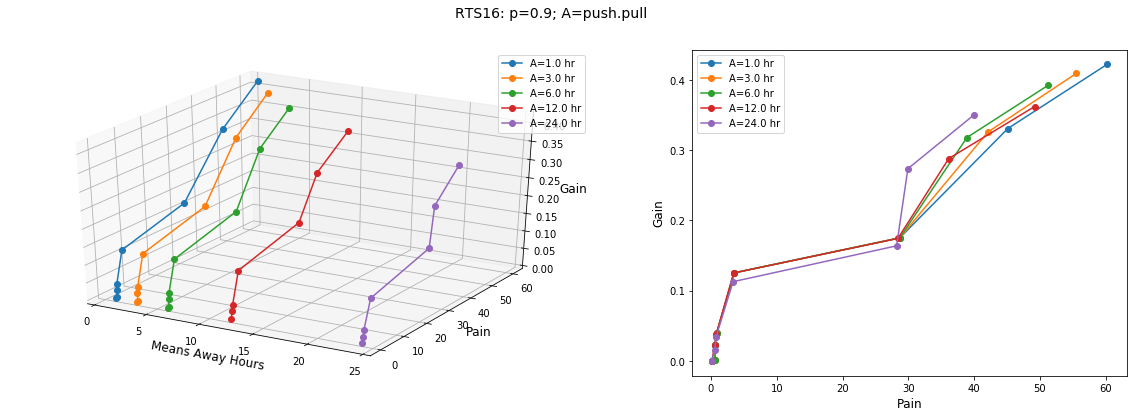

In [178]:
pull_model_3dPlots(rts16_push_pull, 0.1, "new-results/", "rts16")
pull_model_3dPlots(rts16_push_pull, 0.5, "new-results/", "rts16")
pull_model_3dPlots(rts16_push_pull, 0.9, "new-results/", "rts16")

<strong>#finding: For RTS16, we see a similar occurrence as for MB15
- regardless of your persistence, if you visit the system every hour, you can get close to maximum achievable gain
- if you visit the system less often, you should have high persistence to get more gain
- push.pull interaction model gets more gain than only.pull for similar levels of persistence
- _There is relatively little change in pain across persistence levels for *.pull models_</strong>

# TS13 #results

In [179]:
ts13_only_push, ts13_only_pull, ts13_push_pull = get_results_files("new-results/", "ts13")

## TS13: only.push, p=0.1, 0.5, 0.9

TS13: p=0.1; A=only.push
TS13: p=0.5; A=only.push
TS13: p=0.9; A=only.push


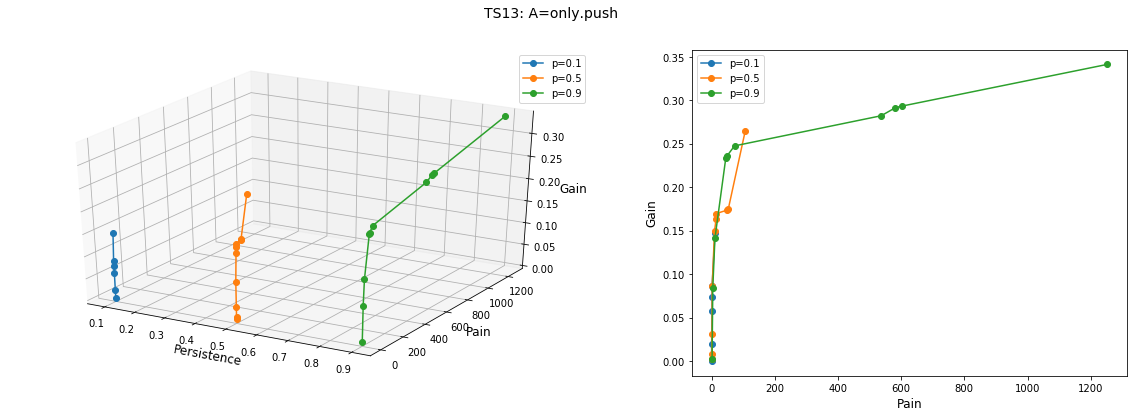

In [180]:
push_model_3dPlots(ts13_only_push, "new-results/", "ts13")

## TS13: only.pull, p=0.1, p=0.5, p=0.9

TS13: p=0.1; A=only.pull.3600
TS13: p=0.1; A=only.pull.10800
TS13: p=0.1; A=only.pull.21600
TS13: p=0.1; A=only.pull.43200
TS13: p=0.1; A=only.pull.86400
TS13: p=0.5; A=only.pull.3600
TS13: p=0.5; A=only.pull.10800
TS13: p=0.5; A=only.pull.21600
TS13: p=0.5; A=only.pull.43200
TS13: p=0.5; A=only.pull.86400
TS13: p=0.9; A=only.pull.3600
TS13: p=0.9; A=only.pull.10800
TS13: p=0.9; A=only.pull.21600
TS13: p=0.9; A=only.pull.43200
TS13: p=0.9; A=only.pull.86400


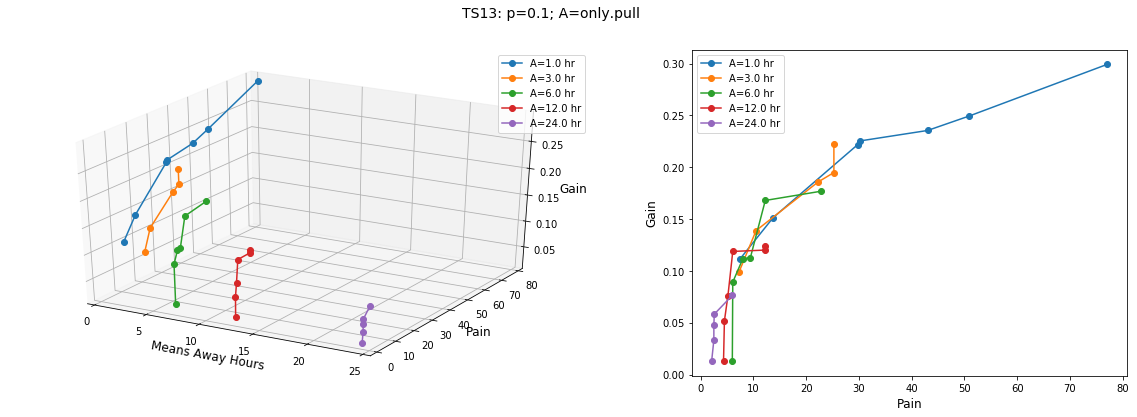

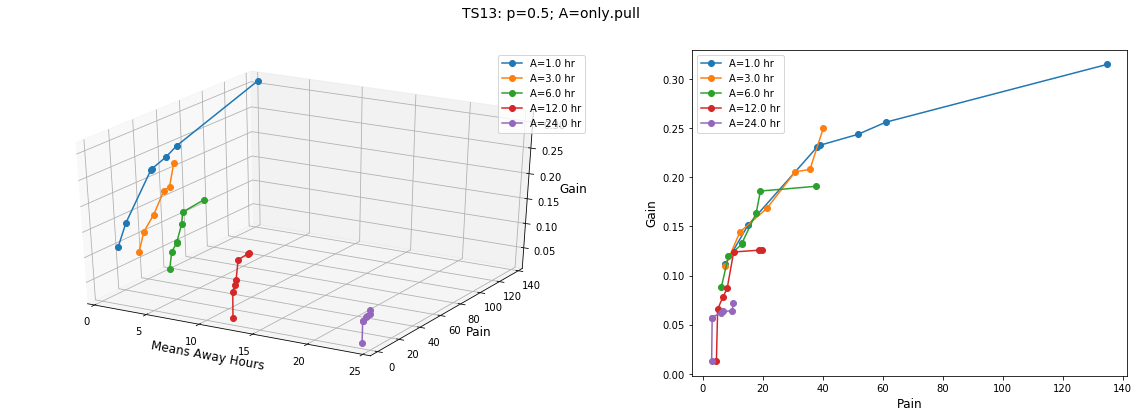

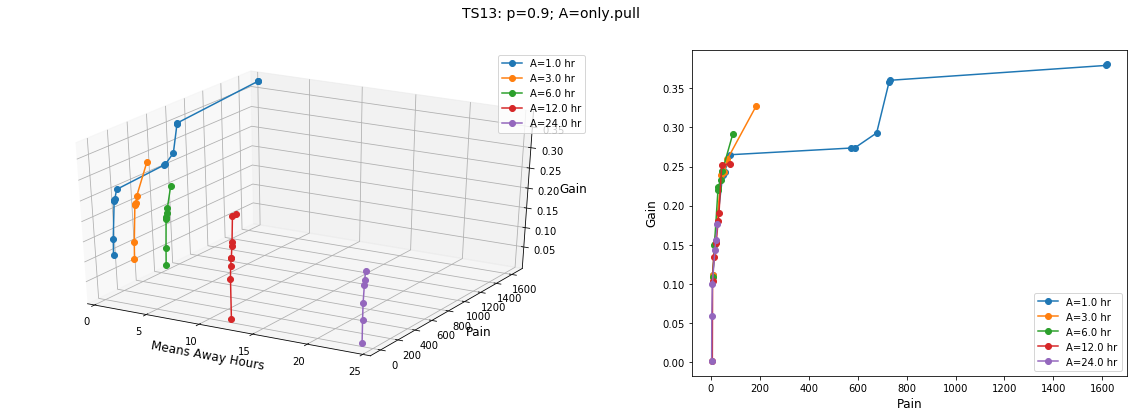

In [181]:
pull_model_3dPlots(ts13_only_pull, 0.1, "new-results/", "ts13")
pull_model_3dPlots(ts13_only_pull, 0.5, "new-results/", "ts13")
pull_model_3dPlots(ts13_only_pull, 0.9, "new-results/", "ts13")

## TS13: only.pull, p=0.1, p=0.5, p=0.9

TS13: p=0.1; A=push.pull.3600
TS13: p=0.1; A=push.pull.10800
TS13: p=0.1; A=push.pull.21600
TS13: p=0.1; A=push.pull.43200
TS13: p=0.1; A=push.pull.86400
TS13: p=0.5; A=push.pull.3600
TS13: p=0.5; A=push.pull.10800
TS13: p=0.5; A=push.pull.21600
TS13: p=0.5; A=push.pull.43200
TS13: p=0.5; A=push.pull.86400
TS13: p=0.9; A=push.pull.3600
TS13: p=0.9; A=push.pull.10800
TS13: p=0.9; A=push.pull.21600
TS13: p=0.9; A=push.pull.43200
TS13: p=0.9; A=push.pull.86400


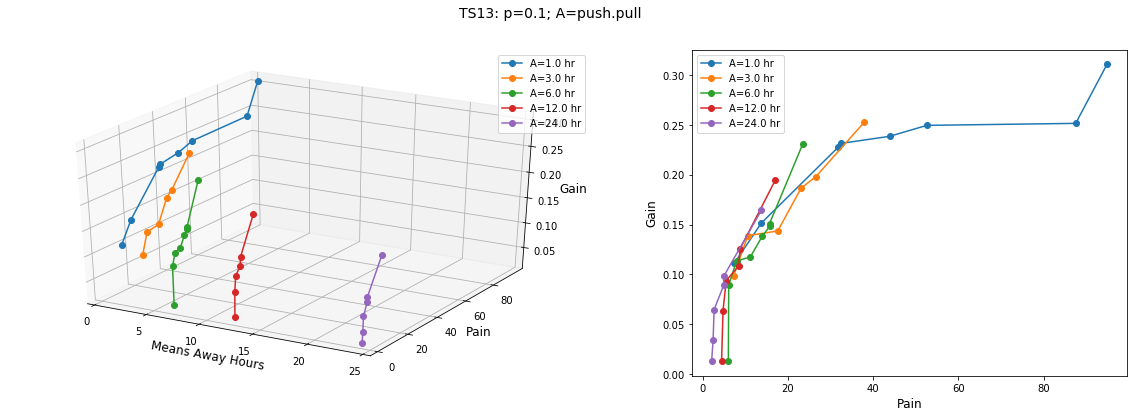

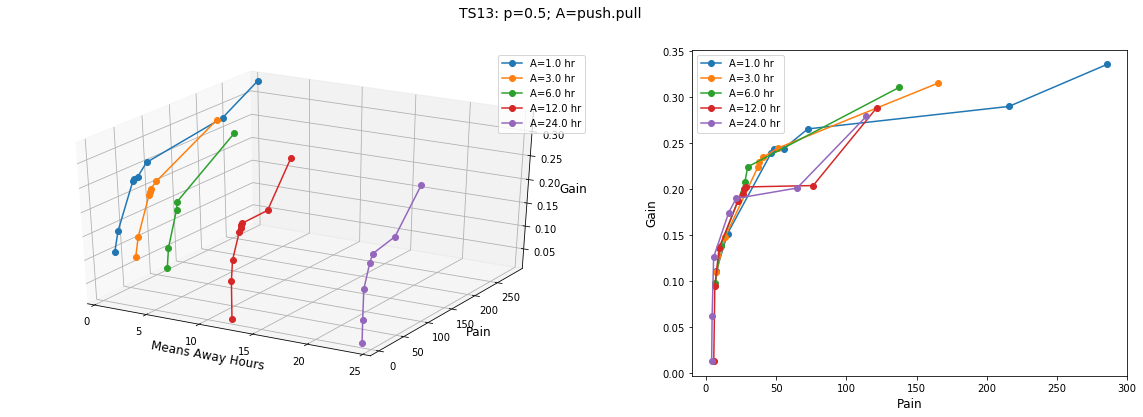

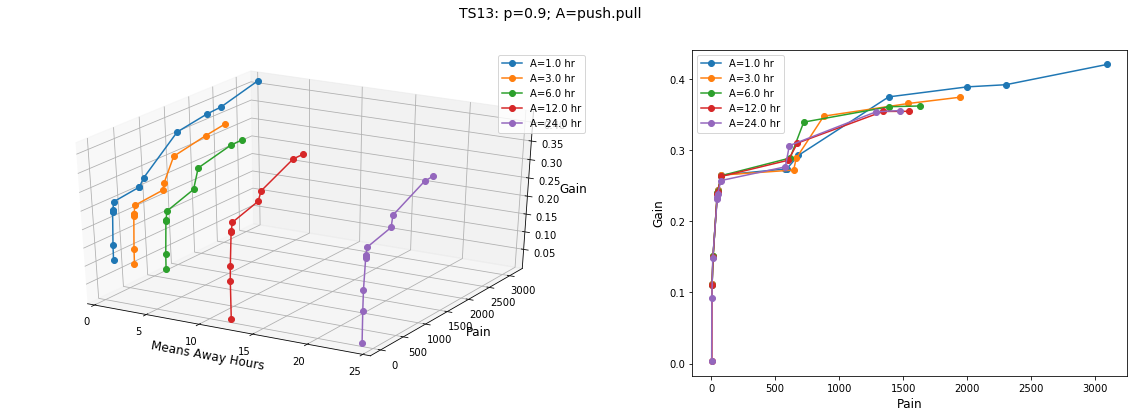

In [182]:
pull_model_3dPlots(ts13_push_pull, 0.1, "new-results/", "ts13")
pull_model_3dPlots(ts13_push_pull, 0.5, "new-results/", "ts13")
pull_model_3dPlots(ts13_push_pull, 0.9, "new-results/", "ts13")

<strong>#finding: For TS13, we get similar results as for MB15 and RTS16
- regardless of your persistence, if you visit the system every hour, you can get close to maximum achievable gain
- if you visit the system less often, you should have high persistence to get more gain
- push.pull interaction model gets more gain than only.pull for similar levels of persistence, however, *the level of pain is lesser in only.pull models*.

#question: why does TS14 NOT follow this trend? --> It could be because of the one extreme outlier (run 3AP).</strong>